# Ⅱ. 따릉이 이용량 변화 분석

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

import json
import folium

geo_path = 'C:/Users/psuny/Desktop/대학원/데이터/따릉이 데이터/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

## 데이터 로드

In [60]:
df = pd.read_csv('C:/Users/psuny/Desktop/대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여소별 월별 이용정보.csv',
                parse_dates = ['기준일자'])
df

,대여소위치,대여소명,기준일자,대여건수,반납건수
0,마포구,서교동 사거리,201801,355,422.0
1,양천구,서울시 도로환경관리센터,201801,0,4.0
2,양천구,으뜸공원,201801,0,1.0
3,양천구,목동2단지 상가,201801,0,1.0
4,광진구,자양사거리 광진아크로텔 앞,201801,349,328.0
...,...,...,...,...,...
71590,중랑구,한양수자인아파트 앞,202106,260,NaN
71591,중랑구,묵동 이마트 앞,202106,1305,NaN
71592,중랑구,망우로 버거킹 앞,202106,1624,NaN
71593,중랑구,중랑데시앙플렉스 앞,202106,218,NaN


In [3]:
df.shape

(71595, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71595 entries, 0 to 71594
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소위치   71595 non-null  object 
 1   대여소명    71595 non-null  object 
 2   기준일자    71595 non-null  object 
 3   대여건수    71595 non-null  int64  
 4   반납건수    45065 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ MB


- 반납건수에 결측치 있음
- 2020년 7월부터 반납건수 없음
- 추후 분석시 반납건수는 2020년 6월까지만 분석

- 기준일자 날짜타입으로 변경

In [61]:
df['기준일자'] = pd.to_datetime(df['기준일자'], format = '%Y%m')

In [4]:
df

,대여소위치,대여소명,기준일자,대여건수,반납건수
0,마포구,서교동 사거리,2018-01-01,355,422.0
1,양천구,서울시 도로환경관리센터,2018-01-01,0,4.0
2,양천구,으뜸공원,2018-01-01,0,1.0
3,양천구,목동2단지 상가,2018-01-01,0,1.0
4,광진구,자양사거리 광진아크로텔 앞,2018-01-01,349,328.0
...,...,...,...,...,...
71590,중랑구,한양수자인아파트 앞,2021-06-01,260,NaN
71591,중랑구,묵동 이마트 앞,2021-06-01,1305,NaN
71592,중랑구,망우로 버거킹 앞,2021-06-01,1624,NaN
71593,중랑구,중랑데시앙플렉스 앞,2021-06-01,218,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71595 entries, 0 to 71594
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소위치   71595 non-null  object        
 1   대여소명    71595 non-null  object        
 2   기준일자    71595 non-null  datetime64[ns]
 3   대여건수    71595 non-null  int64         
 4   반납건수    45065 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [8]:
df.describe()

,대여건수,반납건수
count,71595.000000,45065.000000
mean,934.905189,885.954799
std,988.583346,1011.075034
min,0.000000,0.000000
25%,317.000000,265.000000
50%,656.000000,593.000000
75%,1227.000000,1167.000000
max,23174.000000,24256.000000


## 결측치 확인

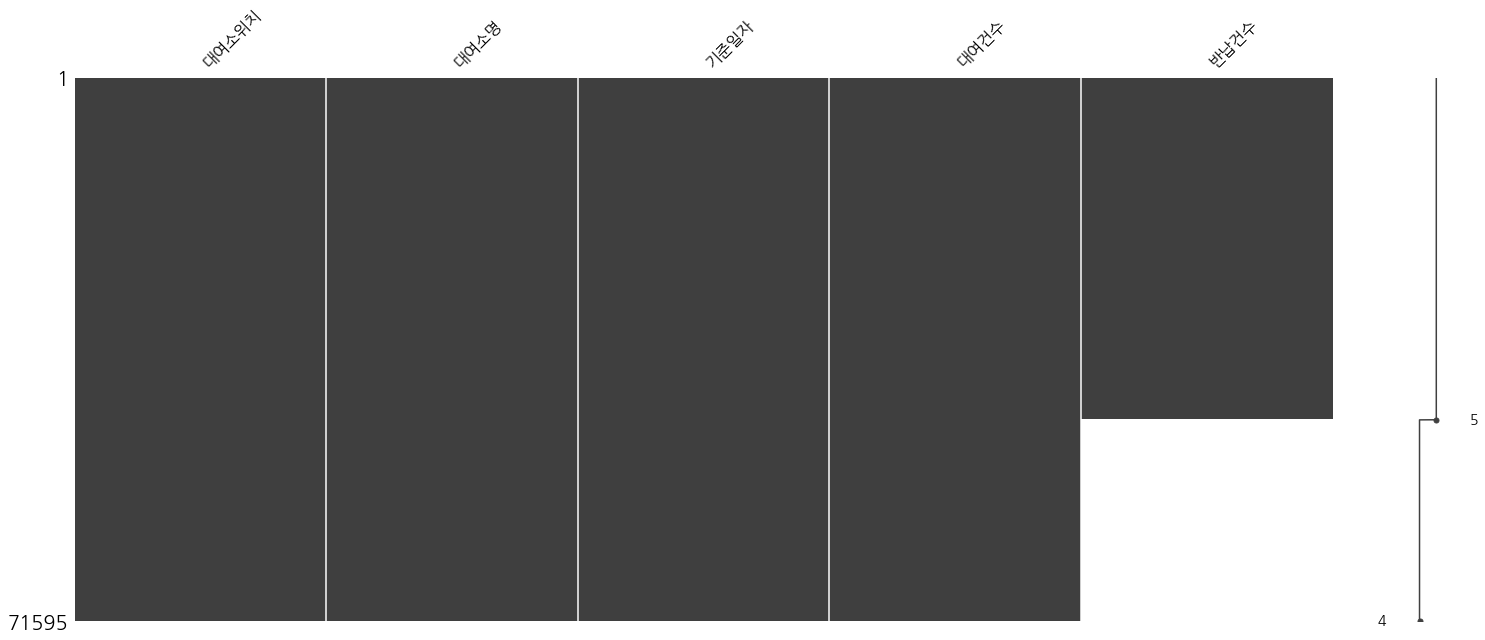

In [9]:
msno.matrix(df)
plt.show()

In [62]:
# 결측치가 있는 행 확인

df[df.isna().any(axis = 1)]

,대여소위치,대여소명,기준일자,대여건수,반납건수
45065,강남구,현대고등학교 건너편,2020-07-01,3997,NaN
45066,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2020-07-01,1250,NaN
45067,강남구,논현역 7번출구,2020-07-01,863,NaN
45068,강남구,신영 ROYAL PALACE 앞,2020-07-01,334,NaN
45069,강남구,MCM 본사 직영점 앞,2020-07-01,436,NaN
...,...,...,...,...,...
71590,중랑구,한양수자인아파트 앞,2021-06-01,260,NaN
71591,중랑구,묵동 이마트 앞,2021-06-01,1305,NaN
71592,중랑구,망우로 버거킹 앞,2021-06-01,1624,NaN
71593,중랑구,중랑데시앙플렉스 앞,2021-06-01,218,NaN


## 시간 칼럼 추가

In [63]:
df['년'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month

In [7]:
df

,대여소위치,대여소명,기준일자,대여건수,반납건수,년,월
0,마포구,서교동 사거리,2018-01-01,355,422.0,2018,1
1,양천구,서울시 도로환경관리센터,2018-01-01,0,4.0,2018,1
2,양천구,으뜸공원,2018-01-01,0,1.0,2018,1
3,양천구,목동2단지 상가,2018-01-01,0,1.0,2018,1
4,광진구,자양사거리 광진아크로텔 앞,2018-01-01,349,328.0,2018,1
...,...,...,...,...,...,...,...
71590,중랑구,한양수자인아파트 앞,2021-06-01,260,NaN,2021,6
71591,중랑구,묵동 이마트 앞,2021-06-01,1305,NaN,2021,6
71592,중랑구,망우로 버거킹 앞,2021-06-01,1624,NaN,2021,6
71593,중랑구,중랑데시앙플렉스 앞,2021-06-01,218,NaN,2021,6


## 특정 피처 값 확인

In [13]:
df['대여소위치'].unique()

array(['마포구', '양천구', '광진구', '성동구', '은평구', '강동구', '송파구', '중랑구', '강북구',
       '노원구', '도봉구', '금천구', '중구', '서초구', '종로구', '강남구', '서대문구', '성북구',
       '구로구', '용산구', '동대문구', '영등포구', '동작구', '강서구', '관악구', '정비센터',
       '그룹명 없음'], dtype=object)

- 정비센터랑 그룹명 없음은 삭제

In [64]:
df = df[df['대여소위치'] != '정비센터']

In [65]:
df = df[df['대여소위치'] != '그룹명 없음']

In [10]:
df['대여소위치'].unique()

array(['마포구', '양천구', '광진구', '성동구', '은평구', '강동구', '송파구', '중랑구', '강북구',
       '노원구', '도봉구', '금천구', '중구', '서초구', '종로구', '강남구', '서대문구', '성북구',
       '구로구', '용산구', '동대문구', '영등포구', '동작구', '강서구', '관악구'], dtype=object)

In [17]:
df['대여소명'].nunique()

2607

- 대여소위치, 대여소명 타입을 카테고리 타입으로 변경

In [66]:
df['대여소위치'] = df['대여소위치'].astype('category')
df['대여소명'] = df['대여소명'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71365 entries, 0 to 71594
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소위치   71365 non-null  category      
 1   대여소명    71365 non-null  category      
 2   기준일자    71365 non-null  datetime64[ns]
 3   대여건수    71365 non-null  int64         
 4   반납건수    44955 non-null  float64       
 5   년       71365 non-null  int64         
 6   월       71365 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 3.6 MB


## 1. 연, 월 기준 이용량 확인

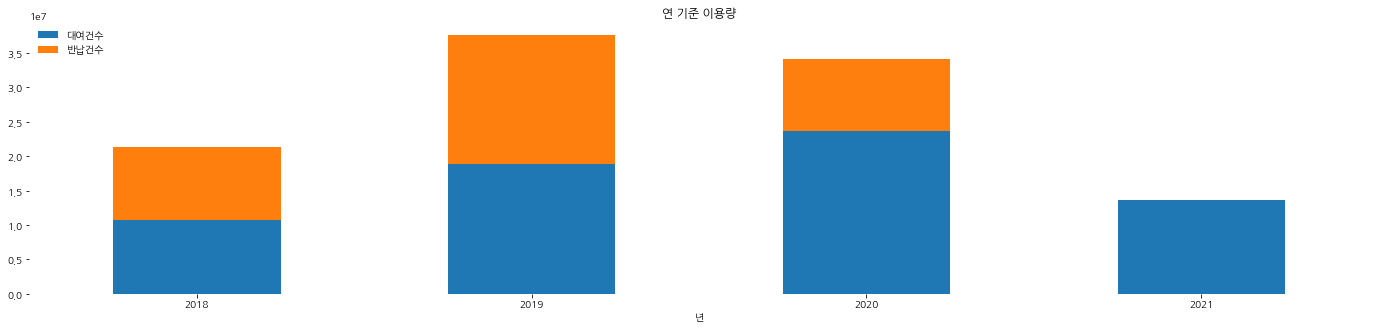

In [13]:
year = df.groupby(['년'])[['대여건수', '반납건수']].agg('sum')
ax = year.plot(kind = 'bar', figsize = (24, 5), rot = 0, stacked = True, title = '연 기준 이용량')
plt.box(False)
plt.legend(loc = 'upper left', frameon = False)
plt.show()

- 반납건수는 2020년 6월까지만 존재함
- 대여건수의 경우 2021년은 6월까지만 데이터가 있음에도 불구하고 이용량이 2020년의 절반을 넘었으므로 추후 연말까지 이용량을 살펴보면 2020년 이용량을 뛰어넘을 것으로 예상 
- 따라서 갈수록 이용량이 늘어남을 알 수 있음

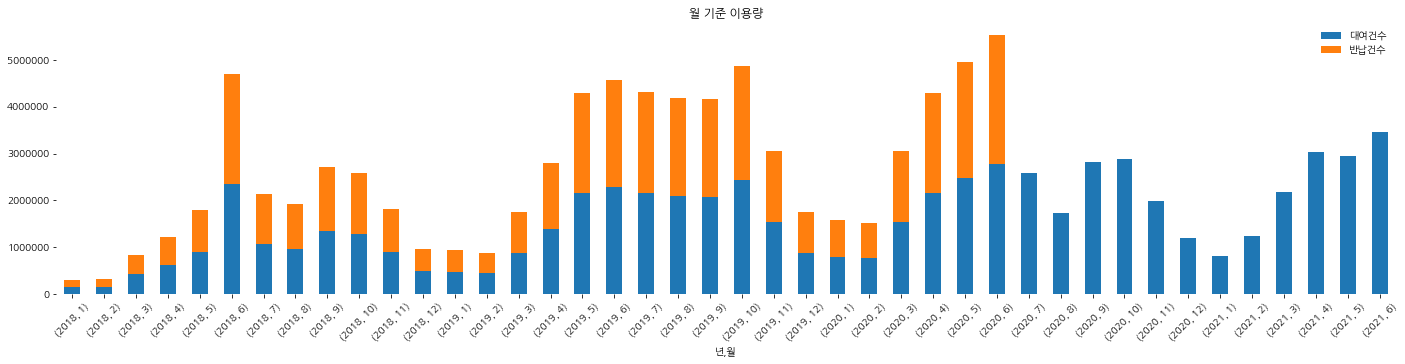

In [14]:
month = df.groupby(['년', '월'])[['대여건수', '반납건수']].agg('sum')
month.plot(kind = 'bar', figsize = (24, 5), rot = 45, stacked = True, title = '월 기준 이용량')
plt.box(False)
plt.legend(frameon = False)
plt.show()

- 여름 전후(4, 5, 6, 7월)에는 사용량이 증가하고 8월에는 약간 감소했다가 9, 10월에 다시 증가하다가 11월, 12월, 1월에는 감소
- 한여름과 겨울에는 이용량이 줄어듦
- 1년을 주기로 봄부터 이용량이 증가하다가 겨울에 이용량이 감소하는 패턴을 보임

- 이용량 증가율 확인해보기
- 6월을 기준으로 직전 해 대비 증가율 확인

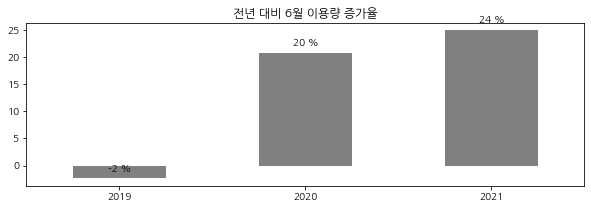

In [15]:
june = month.loc[[(2018, 6), (2019, 6), (2020, 6), (2021, 6)]]['대여건수']
increasing_ratio = []

for i, year in enumerate(june):
    if i == 0:
        continue
    increasing_ratio.append((june[i] - june[i - 1]) / june[i - 1] * 100)
increasing_ratio = pd.Series(increasing_ratio, index = ['2019', '2020', '2021'])

ax = increasing_ratio.plot(kind = 'bar', figsize = (10, 3), rot = 0, title = '전년 대비 6월 이용량 증가율', color = 'grey')
for p in ax.patches:
    ax.annotate('%d %%'%p.get_height(), (p.get_x() + p.get_width()/2, p.get_height() + 1.3), ha = 'center')
#plt.box(False)
#plt.tight_layout()
plt.show()

- 2019년에는 2018년 대비 6월 이용량 증가율이 -2.5%이지만 2020년에는 2019년 대비 증가율이 20%, 2021년에는 2020년 대비 증가율이 약 25%나 됨 
- 거의 전년 대비 이용량 증가율이 증가하고 있으므로 전년 대비 이용량 또한 증가하고 있음을 알 수 있다.
- 특히, 2020년과 2021년에는 이용량 증가율이 급격히 많아짐을 알 수 있다.
- 코로나와 관련이 있으려나?

## 2. 자치구별 이용량

In [72]:
# 21년 6월 대여건수 가장 많은 station명 찾으려고 임시로 함

#df = df[df['년'] != 2018]
#df = df[df['년'] != 2019]
#df = df[df['년'] != 2020]
#df = df[df['월'] != 1]
#df = df[df['월'] != 2]
#df = df[df['월'] != 3]
#df = df[df['월'] != 4]
#df = df[df['월'] != 5]
#df = df[df['대여건수'] != 0]
#df = df[df['대여소위치'] == '영등포구']
#data = df.groupby('대여소명')[['대여건수']].sum()
#data.sort_values('대여건수', ascending=False).head(135)

,대여건수
대여소명,
여의나루역 1번출구 앞,14494
당산육갑문,7601
당산역 10번출구 앞,6670
IFC몰,6629
영등포구청역 1번출구,5891
...,...
대림우성2차아파트,197
국회도서관,197
양평동성원아파트,196


In [32]:
sum_of_use = df.groupby('대여소위치')[['대여건수', '반납건수']].sum()
sum_of_use

,대여건수,반납건수
대여소위치,,
강남구,2473617,1534168.0
강동구,2416992,1469979.0
강북구,1238895,720448.0
강서구,4889108,2391184.0
관악구,2317000,1408808.0
광진구,3705972,2426759.0
구로구,2511490,1429698.0
금천구,1067800,600070.0
노원구,3419527,1933215.0


In [33]:
df[['대여건수', '반납건수']].corr()

,대여건수,반납건수
대여건수,1.000000,0.991199
반납건수,0.991199,1.000000


- 대여건수와 반납건수 강한 상관관계를 보임

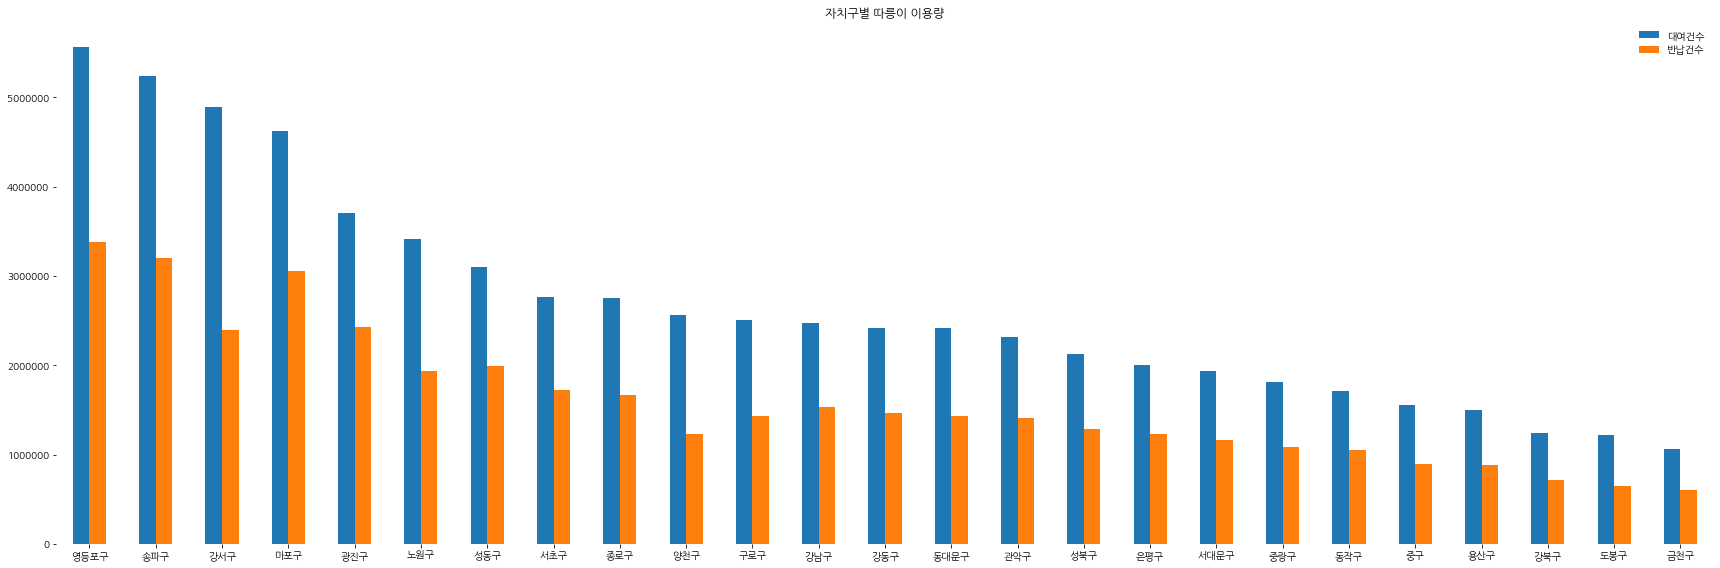

In [34]:
sum_of_use.sort_values('대여건수', ascending = False, inplace = True)
sum_of_use.plot(kind = 'bar', figsize = (24, 8), title = '자치구별 따릉이 이용량', rot = 0)
plt.xlabel('')
plt.box(False)
plt.tight_layout()
plt.legend(frameon = False)
plt.show()

- 대여건수는 2018.01-2021.06까지의 데이터인 반면 반납건수는 2018.01-2020.06까지의 데이터라 차이가 존재함

In [35]:
bike_map = folium.Map(location = [37.541, 126.986], zoom_start = 11, tiles = 'cartodbpositron')
folium.Choropleth(geo_str, data = sum_of_use, columns = [sum_of_use.index, '대여건수'], 
                  key_on = 'feature.properties.SIG_KOR_NM', fill_color = 'Blues').add_to(bike_map)
bike_map

- 영등포구, 송파구, 강서구, 마포구의 이용량이 많음
- 제일 적게 이용하는 지역은 강북구, 도봉구, 금천구
- 제일 적게 이용하는 지역과 제일 많이 이용하는 지역의 차이는 약 5배 가까이 남

- 따릉이_연습3에서 대여소가 가장 많은 곳은 송파구, 강서구, 강남구, 서초구, 영등포구였음
- 대여소가 많으면 이용량도 높을 것 같은데 강남구와 서초구는 왜 대여소에 비해 이용량이 많지 않을까?

## 2.1 시간에 따른 각 자치구의 대여소 개수 확인

In [43]:
# 각 자치구별 대여소 개수를 히트맵으로 시각화

pvt_num_rental = df.pivot_table(index = ['대여소위치'], columns = ['년', '월'], values = '대여소명', aggfunc = 'nunique')
pvt_num_rental

년     2018                                      ... 2021                       \
월       1   2   3   4   5   6   7   8   9   10  ...   3    4    5    6  7  8    
대여소위치                                           ...                             
강남구     67  65  70  78  77  78  79  80  82  93  ...  119  139  139  145  0  0   
강동구     41  41  41  46  46  46  46  46  56  56  ...   88   90   99  110  0  0   
강북구     28  28  28  35  35  35  36  36  36  37  ...   60   60   60   60  0  0   
강서구     37  37  37  53  53  53  53  53  53  68  ...  158  157  159  162  0  0   
관악구     31  32  40  42  43  43  43  43  43  45  ...   67   67   67   69  0  0   
광진구     40  40  42  49  49  49  49  49  49  50  ...   82   82   82   84  0  0   
구로구     37  37  47  52  52  52  52  53  55  54  ...   90   90   90   93  0  0   
금천구     30  30  33  37  37  37  37  37  39  43  ...   60   60   60   60  0  0   
노원구     34  34  45  56  56  57  56  56  56  57  ...   88  113  114  117  0  0   
도봉구     15  15  18  20  20  20  20  21  21  28  ...   57   64   65   67  0  0   
동대문구    36  36  38  40  41  41  41  41  42  48  ...   83   83   83   83  0  0   
동작구     28  28  29  35  35  35  36  36  36  41  ...   68   68   68   71  0  0   
마포구     66  66  66  69  69  70  70  70  70  71  ...  107  104  105  105  0  0   
서대문구    42  42  42  43  44  44  44  44  44  48  ...   74   74   73   73  0  0   
서초구     57  57  63  74  76  75  75  75  80  84  ...  133  136  137  137  0  0   
성동구     53  53  53  54  54  54  54  54  54  55  ...   81   81   82   83  0  0   
성북구     37  37  37  44  44  46  44  44  44  49  ...   73   74   75   75  0  0   
송파구     56  57  58  70  70  70  70  70  81  82  ...  174  175  178  184  0  0   
양천구     21  30  36  42  42  42  43  43  43  51  ...   82   90   98  100  0  0   
영등포구    67  67  69  73  73  73  73  73  73  81  ...  114  114  116  135  0  0   
용산구     24  24  24  33  33  33  33  33  34  38  ...   80   80   80   80  0  0   
은평구     30  30  39  45  45  46  46  48  48  57  ...   80   91   91   93  0  0   
종로구     50  50  50  52  54  54  54  54  60  62  ...  105  104  104  104  0  0   
중구      29  29  29  29  29  30  29  29  29  32  ...   85   85   85   87  0  0   
중랑구     40  42  43  49  49  50  50  50  50  50  ...   79   78   79   81  0  0   

년                  
월     9  10 11 12  
대여소위치              
강남구    0  0  0  0  
강동구    0  0  0  0  
강북구    0  0  0  0  
강서구    0  0  0  0  
관악구    0  0  0  0  
광진구    0  0  0  0  
구로구    0  0  0  0  
금천구    0  0  0  0  
노원구    0  0  0  0  
도봉구    0  0  0  0  
동대문구   0  0  0  0  
동작구    0  0  0  0  
마포구    0  0  0  0  
서대문구   0  0  0  0  
서초구    0  0  0  0  
성동구    0  0  0  0  
성북구    0  0  0  0  
송파구    0  0  0  0  
양천구    0  0  0  0  
영등포구   0  0  0  0  
용산구    0  0  0  0  
은평구    0  0  0  0  
종로구    0  0  0  0  
중구     0  0  0  0  
중랑구    0  0  0  0  

[25 rows x 48 columns]

In [44]:
pvt_num_rental.sort_values(by = [(2018, 6), (2018, 7)], ascending = False, inplace = True)

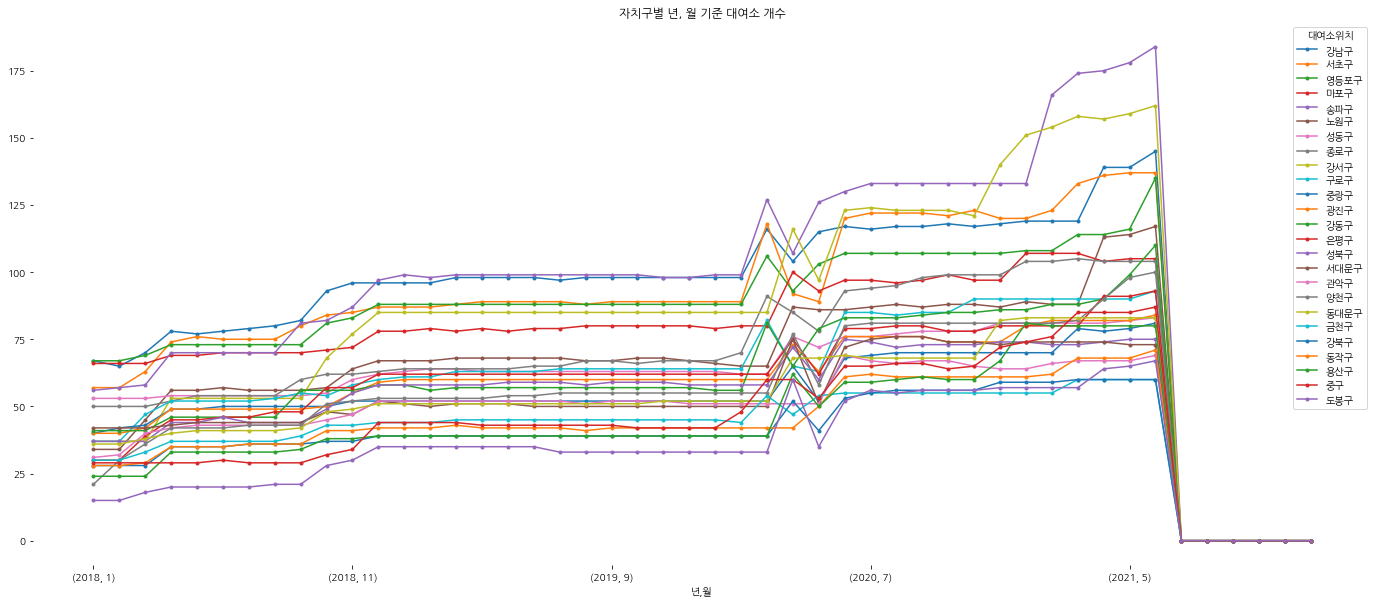

In [45]:
pvt_num_rental.T.plot(style = '.-', figsize = (24, 10), title = '자치구별 년, 월 기준 대여소 개수')
plt.box(False)
plt.show()

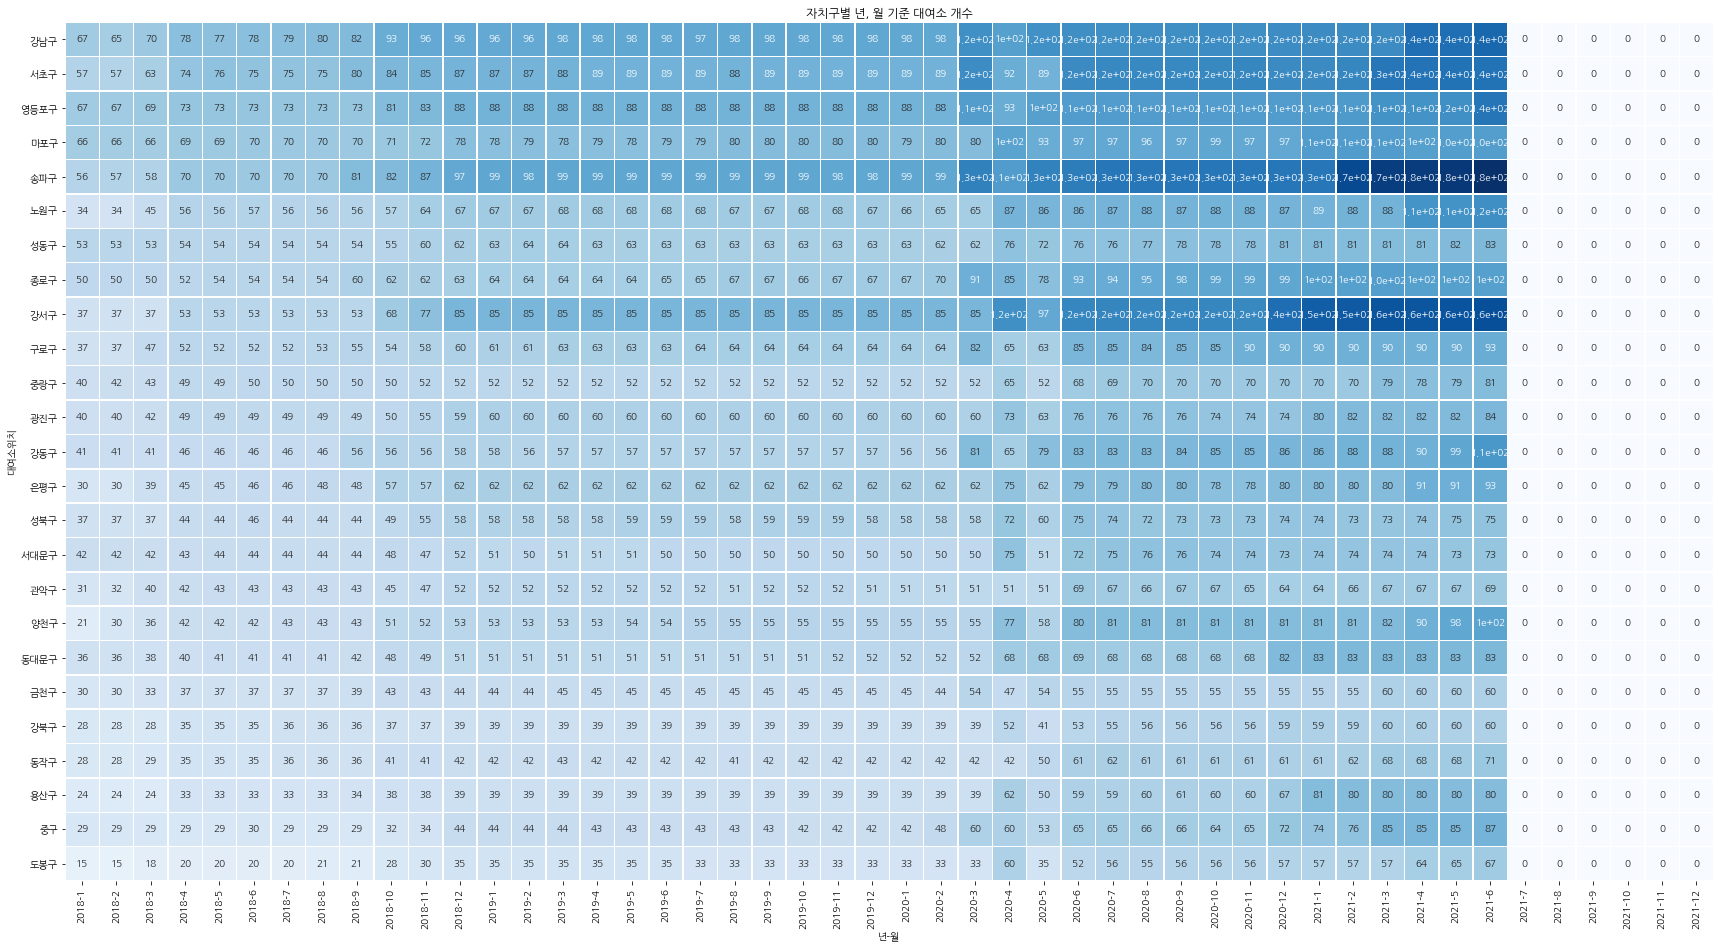

In [52]:
plt.figure(figsize = (24, 14))
sns.heatmap(pvt_num_rental, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('자치구별 년, 월 기준 대여소 개수')
plt.tight_layout()
plt.show()

- 송파구, 강서구의 경우 시간이 지날수록 따릉이 대여소 갯수 많아짐
- 특히, 강서구의 경우 2018년에는 강남구, 서초구보다 대여소 갯수가 적었지만 2020년즈음부터 더 많아짐
- 2020년을 기점으로 다른 지역에서도 따릉이 대여소 갯수가 많아지고 있긴 하지만 특정 자치구에 대여소가 많이 몰려 있음

## 월, 연간 대여소 개수

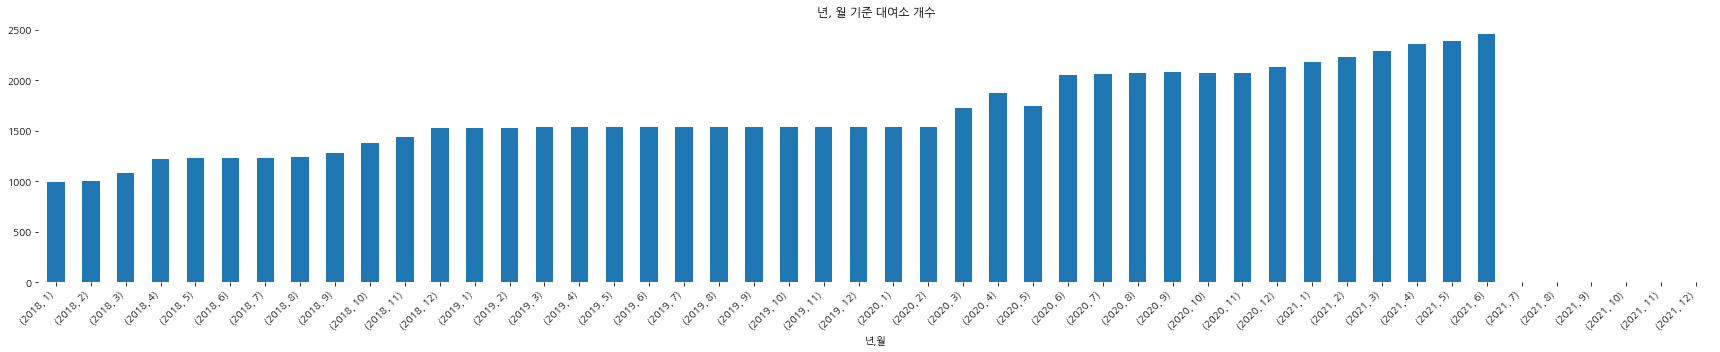

In [53]:
pvt_num_rental.sum(axis = 0).plot(kind = 'bar', figsize = (24, 5), rot = 45, title = '년, 월 기준 대여소 개수')
plt.xticks(ha = 'right')
plt.box(False)
plt.tight_layout()
plt.show()

- 해가 지날수록 대여소 개수가 증가하고 있음
- 2018년에는 증가추세이다가 2019년에는 정체되었었는데 2020년을 기준으로 다시 증가하고 있음

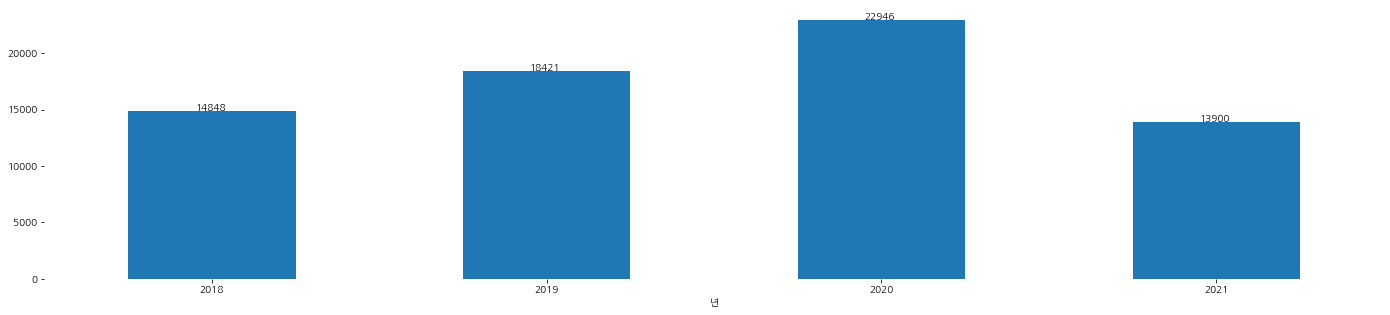

In [56]:
ax = pvt_num_rental.sum(axis = 1, level = 0).sum(axis = 0).plot(kind = 'bar', figsize = (24, 5), rot = 0)
for p in ax.patches:
    ax.annotate('%d'%p.get_height(), (p.get_x() + 0.2, p.get_height()))
plt.box(False)
plt.show()

- 시간이 지날수록 대여소 개수 증가
- 2019년에는 2018년에 비해 약3500개 늘어난 반면 2020년에는 2019년에 비해 약4500개가 늘어남
- 2021년에는 6월까지 데이터라 부정확함

## 2.2 시간에 따른 각 자치구의 이용량 확인

### 대여건수

In [72]:
region_index = list(pvt_num_rental.index)

In [73]:
pvt_num_use = df.pivot_table(index = ['대여소위치'], columns = ['년', '월'], values = '대여건수', aggfunc = 'sum')
pvt_num_use = pvt_num_use.astype('int')
pvt_num_use = pvt_num_use.reindex(index = region_index)
pvt_num_use

년       2018                                                            \
월         1      2      3      4      5       6      7      8       9    
대여소위치                                                                    
강남구     6093   6476  16813  23601  35202   99278  44496  43153   62062   
서초구     6830   7115  18729  27899  39095  106736  47649  41597   64002   
영등포구   16477  16680  42426  63184  85939  206454  95800  86616  121581   
마포구    19113  19047  49002  64351  86670  212548  97435  87371  120074   
송파구     6842   7576  24332  37004  63504  172222  72964  64249  104078   
노원구     3075   3420  12512  22817  36505   96702  45378  41931   61352   
성동구    10641  10736  27918  38314  53220  128046  56763  50475   70333   
종로구    15407  14921  32550  39456  49586  123300  58447  53797   65683   
강서구     3467   3576   9275  17215  31668   92032  44910  39635   53133   
구로구     3814   4182  11627  18756  29414   83068  37740  34059   45379   
중랑구     2910   3233   9556  15459  23664   63272  29381  25643   35920   
광진구     8614   9103  27347  39751  58033  146292  64583  59610   85492   
강동구     3440   3608  10638  16540  27443   79804  37099  33745   49373   
은평구     4662   4622  12494  18934  26078   67834  30404  28243   37923   
성북구     3878   4139  12708  18202  27975   73586  33571  29836   43288   
서대문구    8115   8013  19566  24832  33522   85130  39154  34871   43655   
관악구     4687   4674  12536  19819  30856   89750  41269  36031   47290   
양천구     2130   2510   8179  13323  21766   58778  27944  25701   36520   
동대문구    6675   6453  16808  22845  31678   81672  37228  33745   46512   
금천구     2167   2050   4872   7776  11200   30188  15352  13368   17648   
강북구     1898   1997   5803   9998  15011   41532  19000  17273   25234   
동작구     3455   3817  10575  16289  25207   68096  30958  27444   40682   
용산구     2987   3398   9218  15060  23407   59334  24471  22316   33356   
중구      6643   6723  14983  18023  21966   56998  26786  23194   30379   
도봉구      728    978   3310   5713   9750   26736  11632  10867   16103   

년              ...    2020                           2021                  \
월          10  ...      9       10      11      12     1       2       3    
대여소위치          ...                                                          
강남구     62572  ...   88713   90032   62709   38004  24706   38697   67383   
서초구     59081  ...  111600  110639   73105   43259  29483   46859   80044   
영등포구   111757  ...  232092  234372  153138   93726  64359  103026  183623   
마포구    110151  ...  178507  171919  110104   66393  48660   75510  130789   
송파구    104306  ...  206157  210041  137216   85064  54819   95663  174600   
노원구     56792  ...  150696  155531  112320   66005  41994   61549  110214   
성동구     63681  ...  124738  121767   80820   50643  35822   57634   96024   
종로구     63962  ...   88214  106380   89156   50717  35643   49217   81347   
강서구     53376  ...  254450  273746  185484  104049  75019  108020  205079   
구로구     46631  ...  117217  124569   82320   49223  31633   46909   83896   
중랑구     32784  ...   81327   84512   58801   33380  22773   34817   60466   
광진구     77529  ...  132851  129289   93752   57882  38357   62781  109722   
강동구     47375  ...  103564  103328   67591   42373  26158   43243   77624   
은평구     34902  ...   86933   87483   58652   37503  25442   36532   64352   
성북구     41421  ...   83026   87824   65423   39380  26138   38471   67296   
서대문구    41691  ...   72826   70682   51345   34464  23065   31761   58097   
관악구     47801  ...   98095   99149   68117   41420  27457   38449   67826   
양천구     36500  ...  137875  149193  102688   61832  43330   61853  107902   
동대문구    45230  ...   98712  102426   76174   46490  33426   48842   86130   
금천구     18137  ...   50088   53515   36204   22571  13494   18403   34445   
강북구     22886  ...   54362   56250   40715   24392  16101   23351   40751   
동작구     36432  ...   75096   75224   47619   28387  18950   29501   53124   
용산

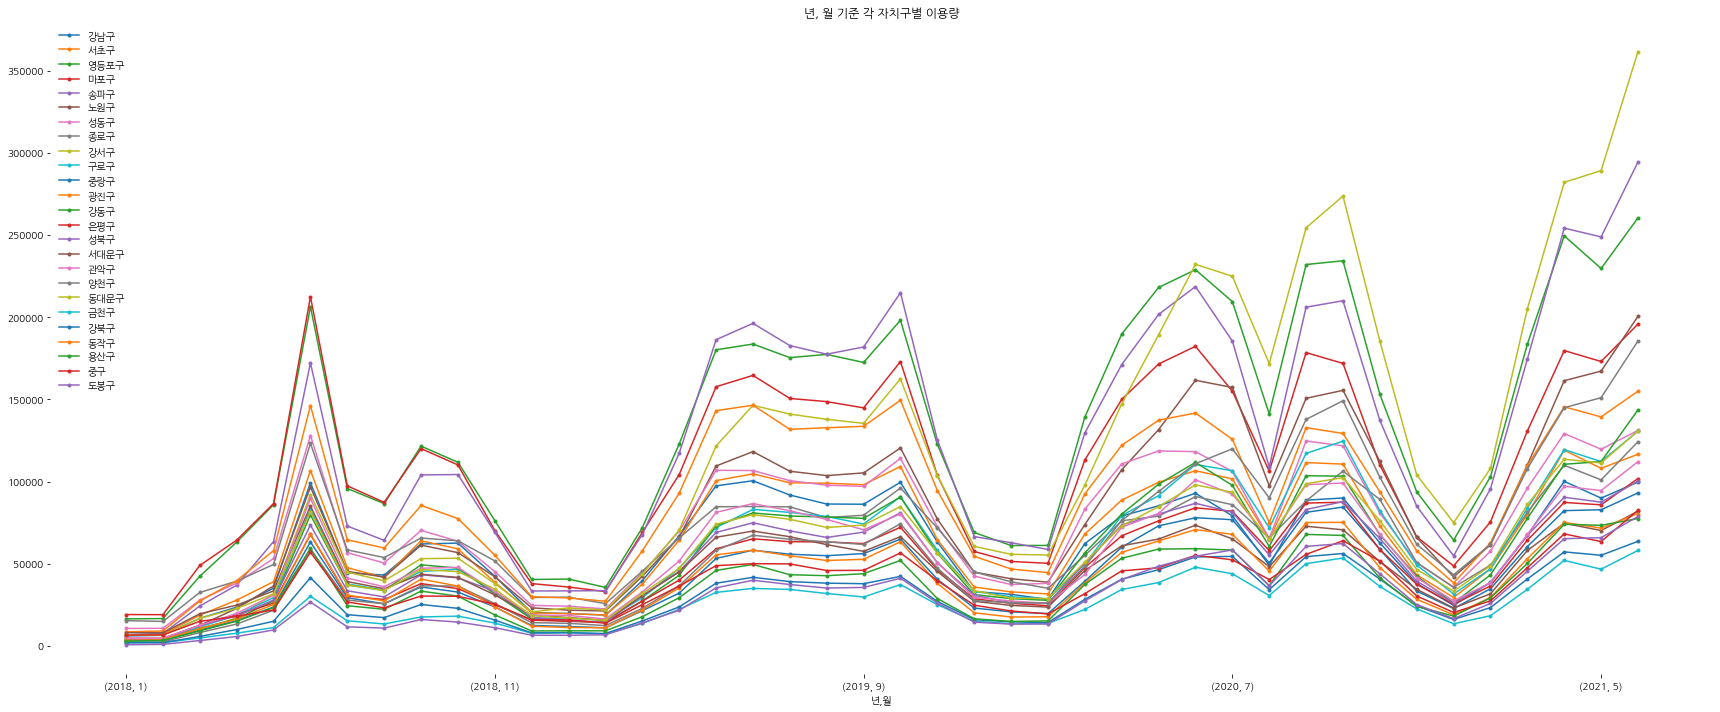

In [74]:
pvt_num_use.T.plot(style = '.-', figsize = (24, 10), title = '년, 월 기준 각 자치구별 이용량')
plt.box(False)
plt.legend(frameon = False)
plt.tight_layout()
plt.show()

- 모든 자치구가 일년 동안의 이용량 추세 패턴이 동일함(봄부터 이용량이 증가하여 여름전후로 가장 많고, 다시 감소하여 겨울에는 이용량이 가장 적음)

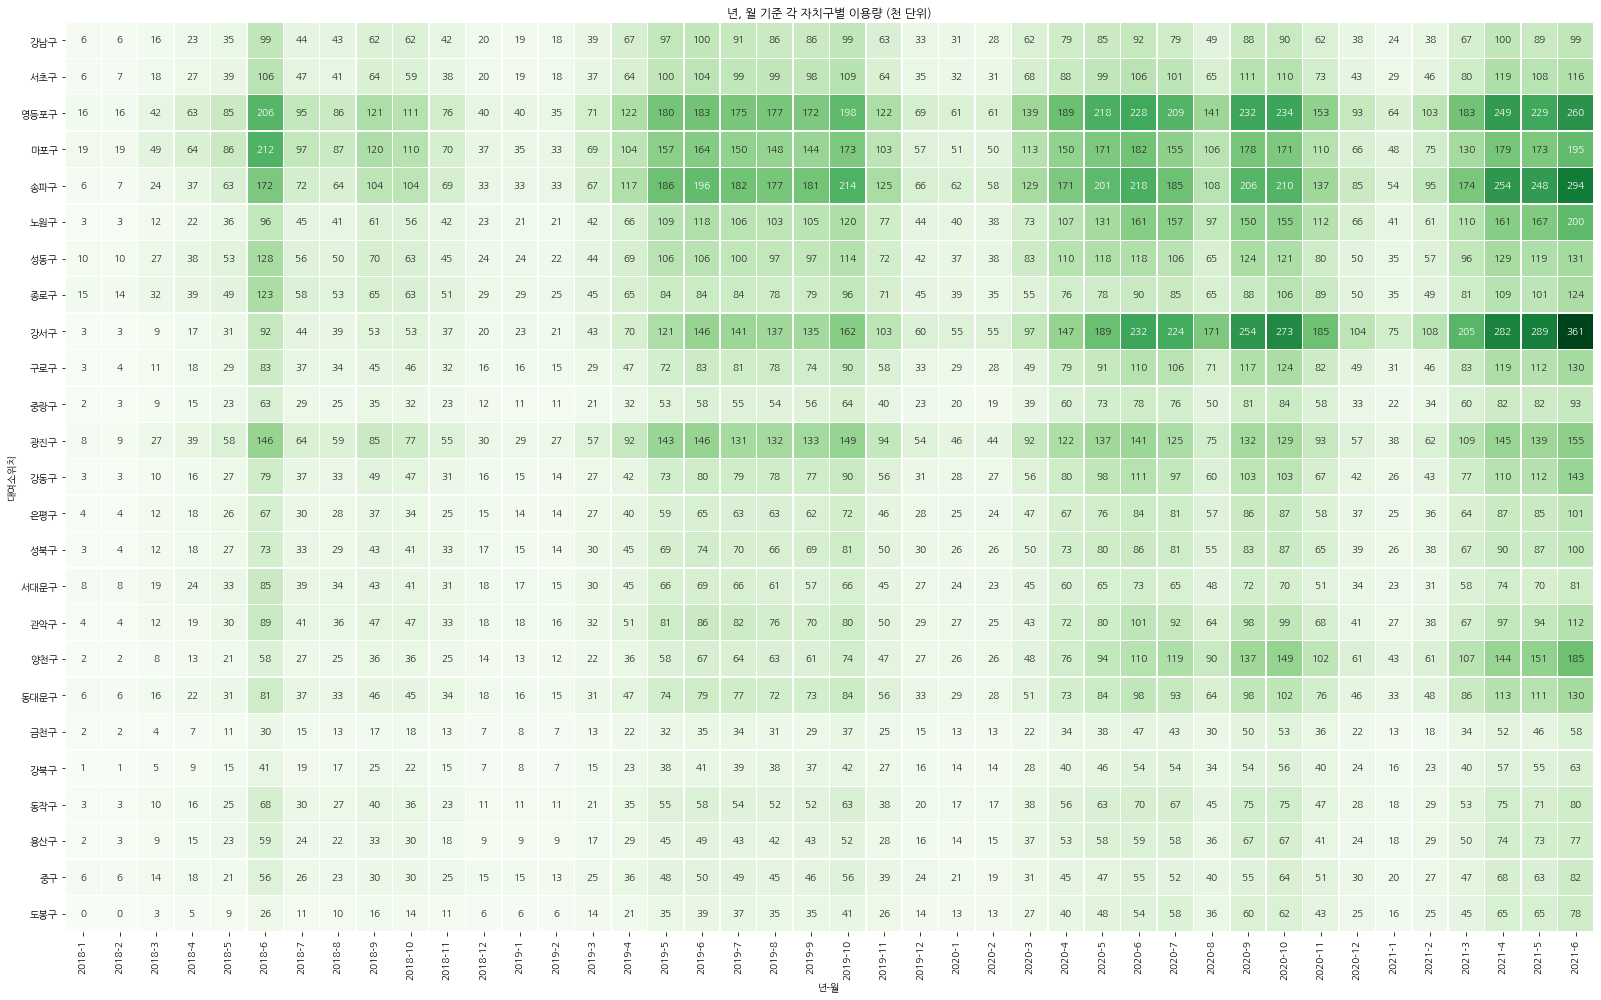

In [76]:
unit = 1000

plt.figure(figsize = (24, 14))
sns.heatmap((pvt_num_use / unit).astype('int'), 
            square = True, cmap = 'Greens', linewidth = 0.5, cbar = False, annot = True, fmt = 'd')
plt.title('년, 월 기준 각 자치구별 이용량 (천 단위)')
plt.tight_layout()
plt.show()

- 히트맵으로도 1년마다 패턴이 반복됨을 확인할 수 있음

### 반납건수

In [77]:
pvt_num_return = df.pivot_table(index = ['대여소위치'], columns = ['년', '월'], values = '반납건수', aggfunc = 'sum').fillna(0)
pvt_num_return = pvt_num_return.astype('int')
pvt_num_return = pvt_num_return.reindex(index = region_index)
pvt_num_return

년       2018                                                            \
월         1      2      3      4      5       6      7      8       9    
대여소위치                                                                    
강남구     5946   6246  15812  22289  33273   92218  40925  39025   56850   
서초구     6763   7100  18700  27268  38492  103542  45885  40674   63714   
영등포구   16340  16474  41840  62087  84924  202756  93262  85287  120967   
마포구    20061  19921  50424  65220  87438  213486  97368  87519  119796   
송파구     6871   7667  24717  37593  63829  173526  73430  64920  105481   
노원구     3110   3404  12290  22603  36290   96474  45332  41610   60748   
성동구    10873  10725  27454  37554  52426  127332  56727  50655   70274   
종로구    15115  14451  30556  36953  46488  113744  54079  50627   61151   
강서구     3506   3552   9775  18386  33453   97050  47454  41582   55687   
구로구     3680   4065  11624  18674  29101   82166  37840  33957   45229   
중랑구     2934   3245   9876  16377  25032   66388  30508  26670   37249   
광진구     8295   8942  27349  39634  57615  144302  63527  58690   84764   
강동구     3426   3645  11066  17123  28539   84170  39099  34976   51052   
은평구     4763   4778  12907  19682  26996   71762  32204  29765   39502   
성북구     3752   4144  12837  18175  27649   74220  34235  29788   42843   
서대문구    7272   7385  18256  23247  31463   80162  37057  32738   41307   
관악구     4604   4609  12292  19930  30711   89862  41528  36268   47193   
양천구     2111   2590   8686  13899  22375   61906  29477  26658   37932   
동대문구    6881   6709  17318  23317  32280   84232  38898  35727   48045   
금천구     2290   2120   4850   7465  10938   29660  14906  13141   17013   
강북구     1812   2003   5859  10206  15340   42510  19557  17470   25489   
동작구     3515   3904  10683  16564  25573   69186  32126  28255   41020   
용산구     2932   3489   9204  15110  23423   59186  24356  22253   33313   
중구      6600   6534  14387  17117  20855   53460  23858  20979   28484   
도봉구      713    935   3388   6075  10342   28864  12365  11495   17017   

년              ... 2020          2021                 
월          10  ...   9  10 11 12   1  2  3  4  5  6   
대여소위치          ...                                    
강남구     57588  ...    0  0  0  0    0  0  0  0  0  0  
서초구     58594  ...    0  0  0  0    0  0  0  0  0  0  
영등포구   110822  ...    0  0  0  0    0  0  0  0  0  0  
마포구    111999  ...    0  0  0  0    0  0  0  0  0  0  
송파구    105351  ...    0  0  0  0    0  0  0  0  0  0  
노원구     56285  ...    0  0  0  0    0  0  0  0  0  0  
성동구     63995  ...    0  0  0  0    0  0  0  0  0  0  
종로구     60466  ...    0  0  0  0    0  0  0  0  0  0  
강서구     55295  ...    0  0  0  0    0  0  0  0  0  0  
구로구     46417  ...    0  0  0  0    0  0  0  0  0  0  
중랑구     33719  ...    0  0  0  0    0  0  0  0  0  0  
광진구     77080  ...    0  0  0  0    0  0  0  0  0  0  
강동구     48963  ...    0  0  0  0    0  0  0  0  0  0  
은평구     36290  ...    0  0  0  0    0  0  0  0  0  0  
성북구     41409  ...    0  0  0  0    0  0  0  0  0  0  
서대문구    38281  ...    0  0  0  0    0  0  0  0  0  0  
관악구     47572  ...    0  0  0  0    0  0  0  0  0  0  
양천구     37822  ...    0  0  0  0    0  0  0  0  0  0  
동대문구    46582  ...    0  0  0  0    0  0  0  0  0  0  
금천구     17798  ...    0  0  0  0    0  0  0  0  0  0  
강북구     23035  ...    0  0  0  0    0  0  0  0  0  0  
동작구     36763  ...    0  0  0  0    0  0  0  0  0  0  
용산구     30679  ...    0  0  0  0    0  0  0  0  0  0  
중구      28533  ...    0  0  0  0    0  0  0  0  0  0  
도봉구     15376  ...    0  0  0  0    0  0  0  0  0  0  

[25 rows x 42 columns]

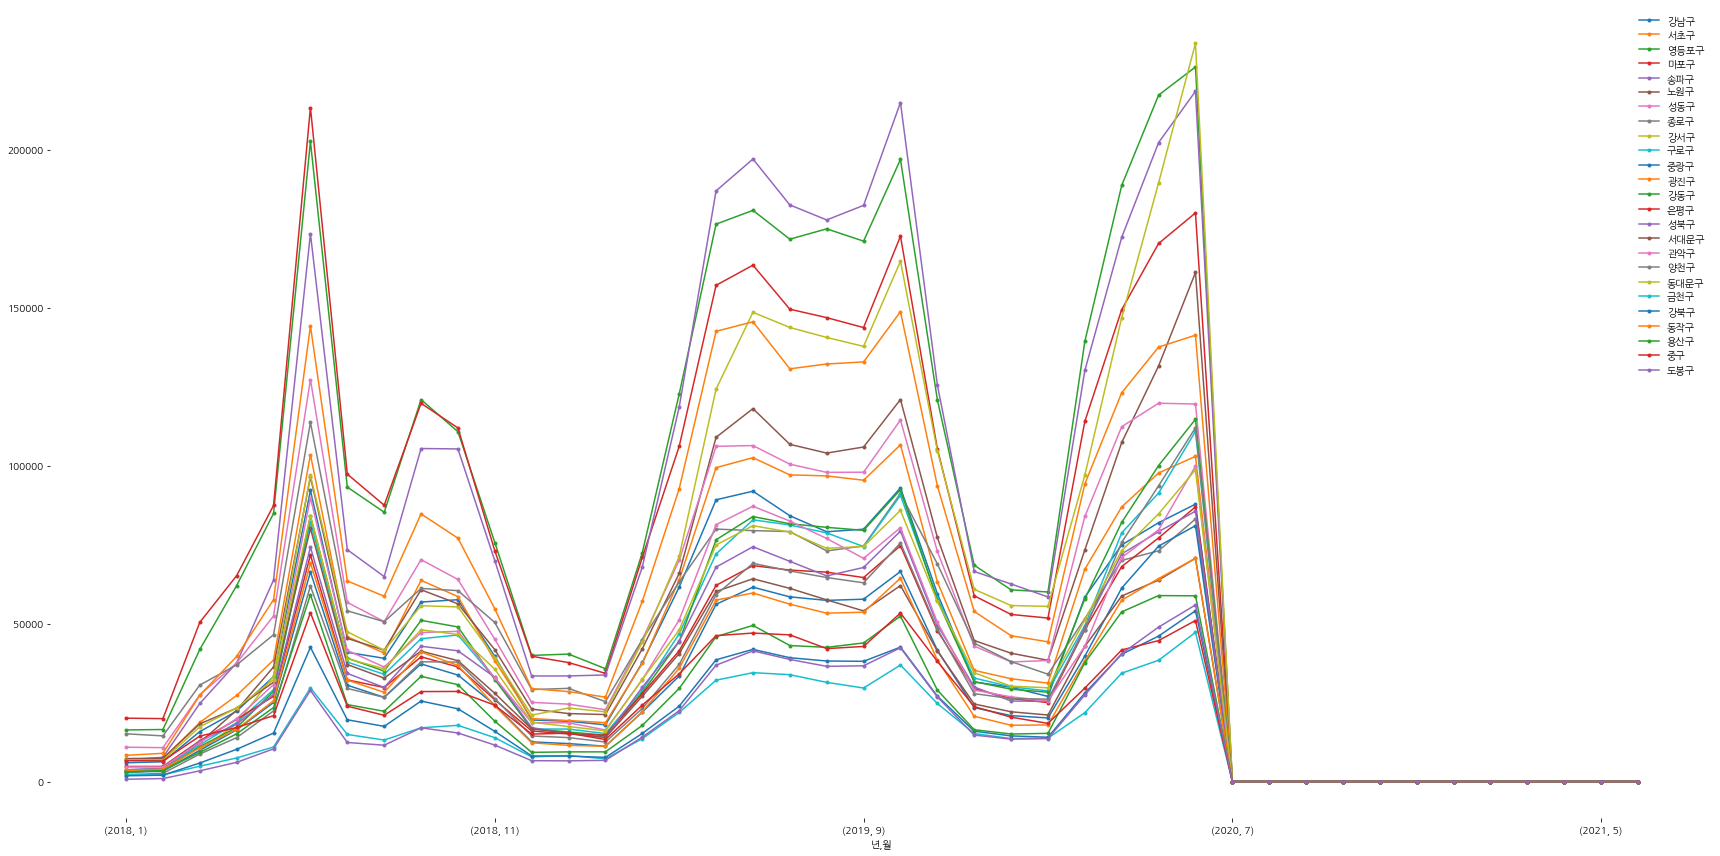

In [78]:
pvt_num_return.T.plot(style = '.-', figsize = (24, 12))
plt.box(False)
plt.legend(frameon = False)
plt.tight_layout()
plt.show()

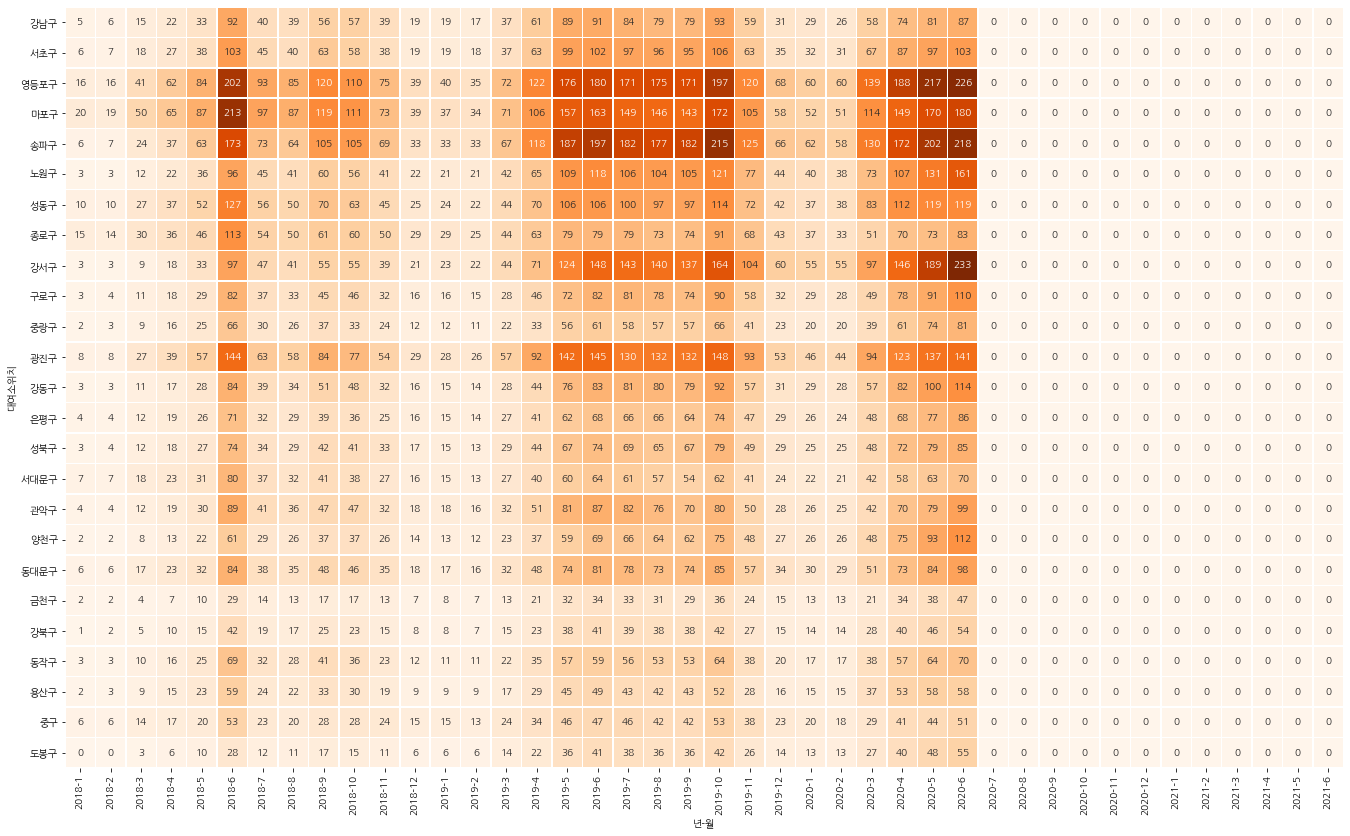

In [80]:
unit = 1000

plt.figure(figsize = (24, 14))
sns.heatmap((pvt_num_return / unit).astype('int'), square = True, 
            cmap = 'Oranges', linewidth = 0.5, cbar = False, annot = True, fmt = 'd')
plt.show()

- 반납건수 역시 대여건수와 마찬가지로 1년 주기로 여름에는 이용량이 증가하다가 겨울에는 감소함
- 반납건수는 2020년 6월자료까지만 있기 때문에 이후는 전부 0으로 처리

## 2.3 자치구별 대여소당 평균 이용량

- 자치구의 대여소 평균 이용량 = 자치구의 대여건수의 합 / 자치구의 대여소 개수
- 즉, 자치구별 한 대여소 당 평균 이용량

In [82]:
pvt_use_ratio = (pvt_num_use / pvt_num_rental).fillna(0)
pvt_use_ratio = pvt_use_ratio.astype('int')
pvt_use_ratio = pvt_use_ratio.reindex(index = region_index)
pvt_use_ratio

년     2018                                                     ...  2021  \
월       1    2    3    4     5     6     7     8     9     10  ...    3    
대여소위치                                                          ...         
강남구     90   99  240  302   457  1272   563   539   756   672  ...   566   
서초구    119  124  297  377   514  1423   635   554   800   703  ...   601   
영등포구   245  248  614  865  1177  2828  1312  1186  1665  1379  ...  1610   
마포구    289  288  742  932  1256  3036  1391  1248  1715  1551  ...  1222   
송파구    122  132  419  528   907  2460  1042   917  1284  1272  ...  1003   
노원구     90  100  278  407   651  1696   810   748  1095   996  ...  1252   
성동구    200  202  526  709   985  2371  1051   934  1302  1157  ...  1185   
종로구    308  298  651  758   918  2283  1082   996  1094  1031  ...   774   
강서구     93   96  250  324   597  1736   847   747  1002   784  ...  1297   
구로구    103  113  247  360   565  1597   725   642   825   863  ...   932   
중랑구     72   76  222  315   482  1265   587   512   718   655  ...   765   
광진구    215  227  651  811  1184  2985  1318  1216  1744  1550  ...  1338   
강동구     83   88  259  359   596  1734   806   733   881   845  ...   882   
은평구    155  154  320  420   579  1474   660   588   790   612  ...   804   
성북구    104  111  343  413   635  1599   762   678   983   845  ...   921   
서대문구   193  190  465  577   761  1934   889   792   992   868  ...   785   
관악구    151  146  313  471   717  2087   959   837  1099  1062  ...  1012   
양천구    101   83  227  317   518  1399   649   597   849   715  ...  1315   
동대문구   185  179  442  571   772  1992   908   823  1107   942  ...  1037   
금천구     72   68  147  210   302   815   414   361   452   421  ...   574   
강북구     67   71  207  285   428  1186   527   479   700   618  ...   679   
동작구    123  136  364  465   720  1945   859   762  1130   888  ...   781   
용산구    124  141  384  456   709  1798   741   676   981   796  ...   627   
중구     229  231  516  621   757  1899   923   799  1047   944  ...   559   
도봉구     48   65  183  285   487  1336   581   517   766   519  ...   796   

년                                          
월        4     5     6  7  8  9  10 11 12  
대여소위치                                      
강남구     720   647   687  0  0  0  0  0  0  
서초구     875   789   851  0  0  0  0  0  0  
영등포구   2188  1980  1929  0  0  0  0  0  0  
마포구    1728  1648  1865  0  0  0  0  0  0  
송파구    1452  1398  1600  0  0  0  0  0  0  
노원구    1428  1467  1714  0  0  0  0  0  0  
성동구    1595  1459  1580  0  0  0  0  0  0  
종로구    1056   971  1194  0  0  0  0  0  0  
강서구    1796  1819  2232  0  0  0  0  0  0  
구로구    1327  1246  1405  0  0  0  0  0  0  
중랑구    1055  1049  1149  0  0  0  0  0  0  
광진구    1774  1699  1845  0  0  0  0  0  0  
강동구    1228  1133  1306  0  0  0  0  0  0  
은평구     959   943  1095  0  0  0  0  0  0  
성북구    1222  1166  1337  0  0  0  0  0  0  
서대문구   1009   962  1123  0  0  0  0  0  0  
관악구    1450  1411  1625  0  0  0  0  0  0  
양천구    1610  1541  1856  0  0  0  0  0  0  
동대문구   1368  1341  1575  0  0  0  0  0  0  
금천구     867   778   969  0  0  0  0  0  0  
강북구     953   919  1061  0  0  0  0  0  0  
동작구    1105  1054  1134  0  0  0  0  0  0  
용산구     925   917   969  0  0  0  0  0  0  
중구      802   747   949  0  0  0  0  0  0  
도봉구    1019  1013  1176  0  0  0  0  0  0  

[25 rows x 48 columns]

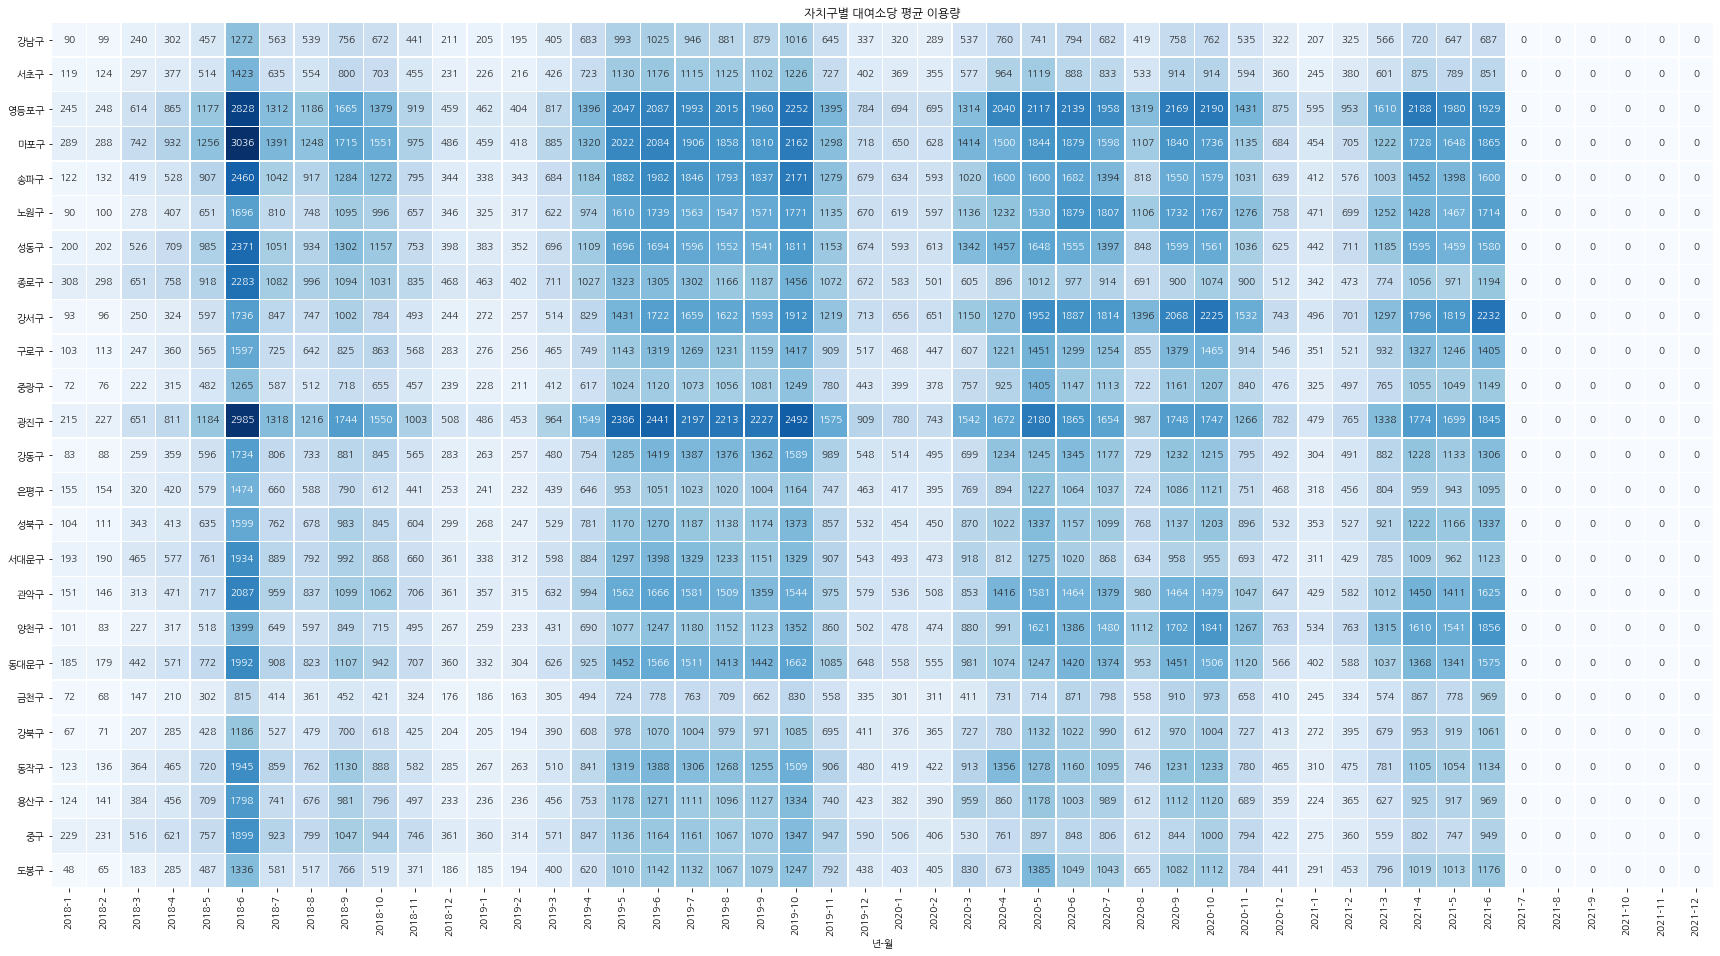

In [83]:
unit = 1

plt.figure(figsize = (24, 14))
sns.heatmap((pvt_use_ratio / unit).astype('int'), square = True, cmap = 'Blues', 
            linewidth = 0.5, cbar = False, annot = True, fmt = 'd')
plt.title('자치구별 대여소당 평균 이용량')
plt.ylabel('')
plt.tight_layout()
plt.show()

- 자치구별 대여소당 평균 이용량는 영등포구, 마포구, 광진구, 송파구 등이 높은 편
- 이 중 광진구는 전체 이용량에서는 눈에 띄는 편이 아니었지만 대여소당 평균 이용량은 높은 편이다.
- 광진구의 대여소갯수 역시 많은 편이 아님. 그렇다면 광진구의 대여소 개수를 늘리면 전체 이용량도 증가할까?
- 이에 비해 대여소가 많았던 강남, 서초는 대여소당 평균 이용량은 적은편.

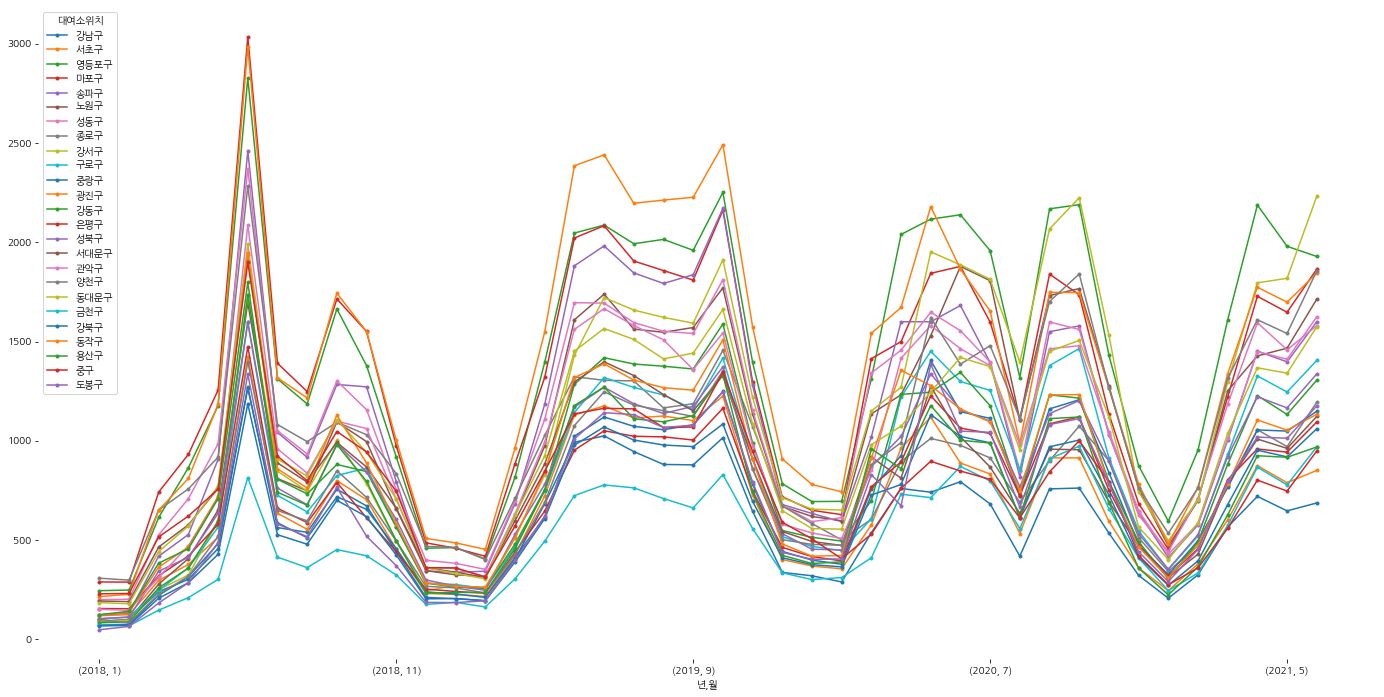

In [84]:
sum_use_ratio = pvt_use_ratio.T.loc[(2018, 1) : (2021, 6)]
sum_use_ratio.plot(style = '.-', figsize = (24, 12))
plt.box(False)
plt.show()

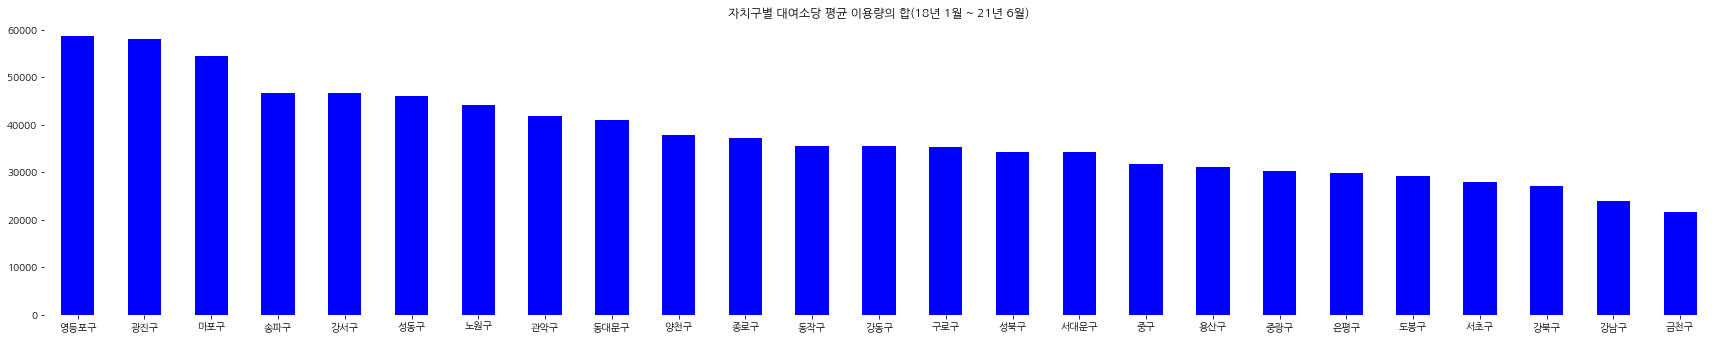

In [89]:
sum_use_ratio = pvt_use_ratio.T.loc[(2018, 1) : (2021, 6)].T.sum(axis = 1)
sum_use_ratio.sort_values(ascending = False, inplace = True)

sum_use_ratio.plot(kind = 'bar', figsize = (24, 5), rot = 0, 
                   title = '자치구별 대여소당 평균 이용량의 합(18년 1월 ~ 21년 6월)', color = 'Blue')
plt.box(False)
plt.tight_layout()
plt.xlabel('')
plt.show()

- 자치구별 대여소당 평균 이용량이 가장 높은 자치구는 영등포구, 광진구, 마포구이다.
- 가장 높은 자치구(영등포구)와 가장 낮은 자치구(금천구)의 차이는 약 3배 가까이 난다.